### Objectives



1. Review Linear Algebra and Vector Calculus   
2. Basic Image Processing (Read/Write image from/to file and display)
3. Skin Detection
4. Red Eye Detection



### Development Environment Preparation

Course programming language: Python
Required libraries: OpenCV, Numpy, Matplotlib,
IDE: jupyter notebook is preferred

Colab basic features: https://colab.research.google.com/notebooks/basic_features_overview.ipynb

Colab instructions: https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d

How to install OpenCV on Ubuntu 16.04: https://www.pyimagesearch.com/2016/10/24/ubuntu-16-04-how-to-install-opencv/

How to install OpenCV on Ubuntu 18.04: https://www.pyimagesearch.com/2018/05/28/ubuntu-18-04-how-to-install-opencv/

How to install OpenCV on Windows: https://www.learnopencv.com/install-opencv3-on-windows/

## Reminder on Vectors and Matrices

- **Vector $v \in \mathbb{R}^{n\times1}$** is a column:      \begin{align}
    v &= \begin{bmatrix}
           v_{1} \\
           v_{2} \\
           \vdots \\
           v_{n}
         \end{bmatrix}
  \end{align}
  
  
 - **Transposed vector** $ v^T \in \mathbb{R}^{1\times n}$ is a row: \begin{align} y &= [v_{1},v_{2},\cdots, v_{n}] \end{align}
 
 - **Matrix** $ A \in \mathbb{R}^{m\times n}$ is an array of numbers:
 
$$
A = 
\begin{vmatrix}
a_{11}&a_{12}&\cdots & a_{1n}\\
\vdots& &\\
a_{m1}&a_{m2} &\cdots & a_{mn}\\
\end{vmatrix}
$$

- Images are represented as a matrix of pixel brightness

- Grayscale images have one number per pixel, and are stored as an m × n matrix. Color images have 3 numbers per pixel – red, green, and blue brightnesses. Stored as an m × n × 3 matrix.

- **Inner product (dot product) of vectors** (scalar)

$$x^Ty = \begin{align} [v_{1},v_{2},\cdots, v_{n}]
     \begin{bmatrix}
           v_{1} \\
           v_{2} \\
           \vdots \\
           v_{n}
         \end{bmatrix}
  \end{align} = \sum^n_{i=1}x_i y_i$$ 
  
 - **Addition of matricies**
 $$ \begin{vmatrix}
a&b\\
c&d\\
\end{vmatrix}+ \begin{vmatrix} 1&2\\ 3&4\\ \end{vmatrix} = \begin{vmatrix} a+1&b+2\\ c+3&d+4\\ \end{vmatrix}$$

\\

 $$ \begin{vmatrix} a&b\\ c&d\\ \end{vmatrix}+ 7 = 
 \begin{vmatrix} a+7&b+7\\ c+7&d+7\\ \end{vmatrix}$$
\
 $$ \begin{vmatrix} a&b\\ c&d\\ \end{vmatrix} * 3 = \begin{vmatrix}
3a&3b\\ 3c&3d\\ \end{vmatrix}$$

- **Matrix multiplication**

 $$ \begin{vmatrix} 0&2\\ 4&6\\ \end{vmatrix} \times \begin{vmatrix} 1&3\\ 5&7\\ \end{vmatrix}  = \begin{vmatrix} 10&14\\ 34&54\\ \end{vmatrix}$$

$$(0*3 + 2*7 = 14)$$

- **Matrix transpose**
 $$ \begin{vmatrix}
0&1\\
2&3\\
4&5\\
\end{vmatrix}^T = \begin{vmatrix}
0&2&4\\
1&3&5\\
\end{vmatrix}$$


## Basic image processing tasks

In [0]:
# Import libraries
# all plots will be set directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
# set inline plots size
plt.rcParams["figure.figsize"] = (12, 7) # (w, h)
import numpy as np
import cv2

### Download images

In [0]:
!wget https://upload.wikimedia.org/wikipedia/commons/6/66/An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg -O cat.jpg
!wget https://cdncontribute.geeksforgeeks.org/wp-content/uploads/2-500x250-2.jpg -O space.jpg 
!wget http://www.stickpng.com/assets/images/584999937b7d4d76317f5ffd.png -O glasses.png
!wget https://images.aif.ru/017/109/817a5ff415e185e6d84ae9a3b9ee619c.jpg -O person.jpg
!wget https://www.scss.tcd.ie/Kenneth.Dawson-Howe/Projects/Previous/FYP2004_HuaYuenHui.jpg -O red_eyes.jpg

--2019-08-22 09:18:54--  https://upload.wikimedia.org/wikipedia/commons/6/66/An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789779 (771K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>] 771.27K  --.-KB/s    in 0.1s    

2019-08-22 09:18:54 (7.09 MB/s) - ‘cat.jpg’ saved [789779/789779]

--2019-08-22 09:18:55--  https://cdncontribute.geeksforgeeks.org/wp-content/uploads/2-500x250-2.jpg
Resolving cdncontribute.geeksforgeeks.org (cdncontribute.geeksforgeeks.org)... 13.35.87.85, 13.35.87.69, 13.35.87.137, ...
Connecting to cdncontribute.geeksforgeeks.org (cdncontribute.geeksforgeeks.org)|13.35.87.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93336 (91K) [image/jpeg]


### Read/Write image from/to file and display

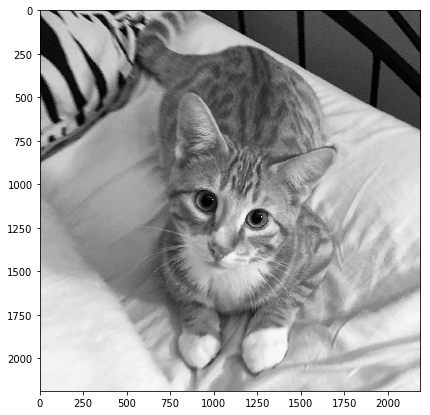

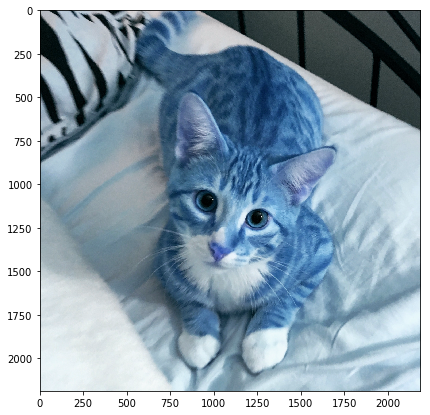

OpenCV representation of image in Python is <class 'numpy.ndarray'>
Numpy array of size:(2187, 2187, 3)


In [0]:
# read image from file 
# grayscale image 
GAUSSIAN_SMOOTH_FILTER_SIZE = (5, 5)
img_gray = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap = 'gray')
plt.show()

# bgr image
img = cv2.imread('cat.jpg', cv2.IMREAD_COLOR)
plt.imshow(img)
plt.show()

# save image to file
cv2.imwrite('cat_saved.jpg',img_gray)

# function imshow also can be used, but not in colab, because it breaks colab kernel
# cv2.namedWindow('image', cv2.WINDOW_NORMAL)
# cv2.imshow('image',img)


# The underlying representation is a numpy array!
print('OpenCV representation of image in Python is {}'.format(type(img)))
print('Numpy array of size:{}'.format(img.shape))

### Convert image from BGR to RGB

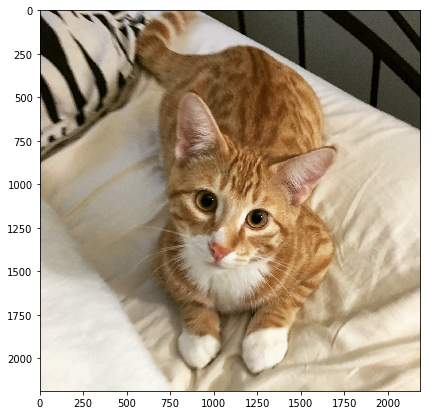

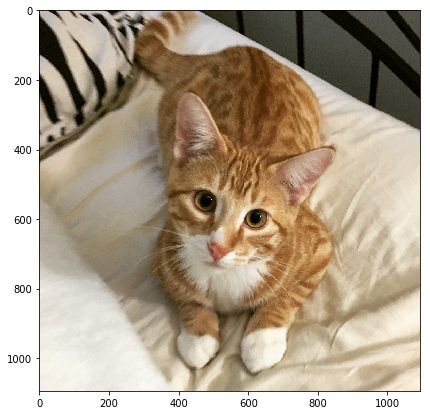

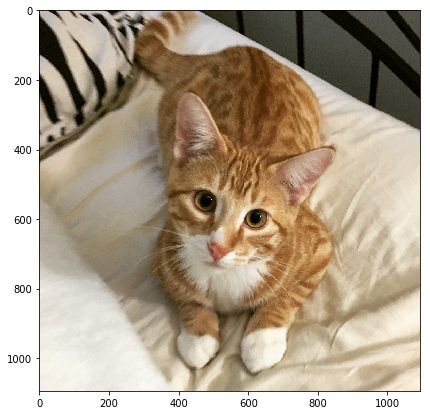

In [0]:
# using opencv
imgbgr = img
imgrgb = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
plt.imshow(imgrgb)
plt.show()

# resize the image
imgrgb = cv2.resize(imgrgb, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)

plt.imshow(imgrgb)
plt.show()

# or just usin python indexing, reverse the order of colors
imgrgb = imgbgr[:,:,::-1]
imgrgb = cv2.resize(imgrgb, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
plt.imshow(imgrgb)
plt.show()

### Split color image on channels

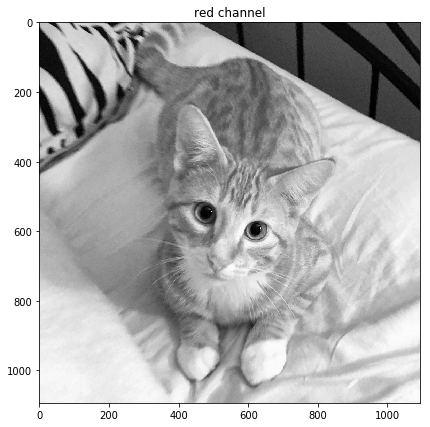

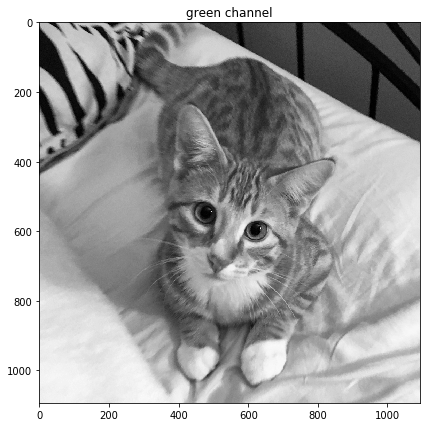

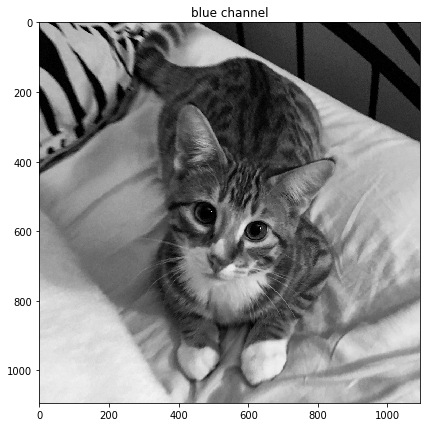

red channel size (1094, 1094)
green channel size (1094, 1094)
blue channel size (1094, 1094)
merged image size (1094, 1094, 3)


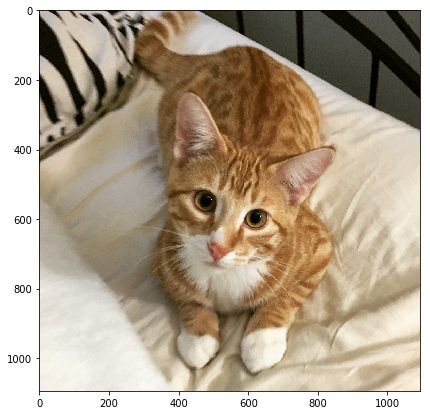

In [0]:
# split color image on channels
img_r,img_g,img_b = cv2.split(imgrgb)

plt.imshow(img_r, cmap = 'gray')
plt.title('red channel')
plt.show()
plt.imshow(img_g, cmap = 'gray')
plt.title('green channel')
plt.show()
plt.imshow(img_b, cmap = 'gray')
plt.title('blue channel')
plt.show()

# merge color channels
img_merged = cv2.merge((img_r,img_g,img_b))
print('red channel size {}'.format(img_r.shape))
print('green channel size {}'.format(img_g.shape))
print('blue channel size {}'.format(img_b.shape))
print('merged image size {}'.format(img_merged.shape))

plt.imshow(img_merged)
plt.show()

### Exercise

Split image on channels using python indexing

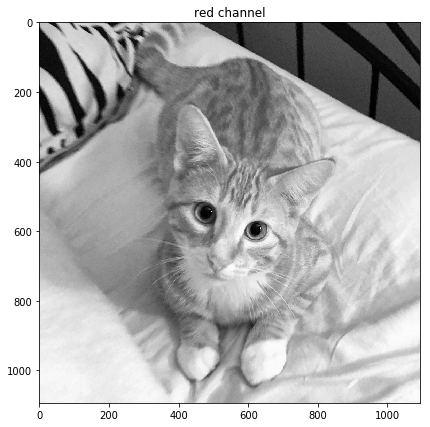

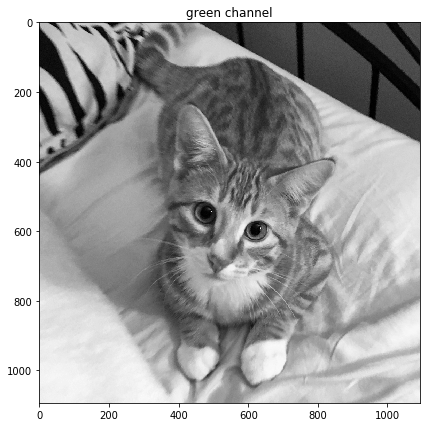

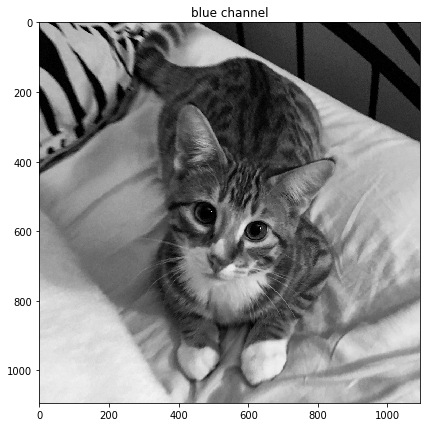

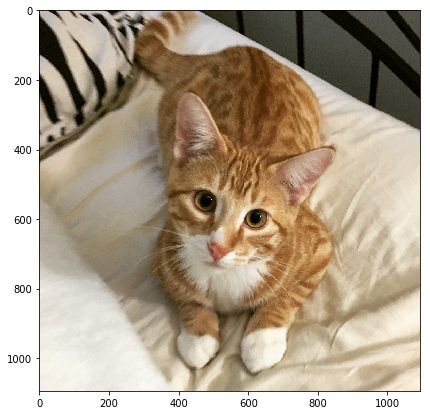

In [0]:
# split color image on channels using python indexing
img_r,img_g,img_b = imgrgb[:,:,0], imgrgb[:,:,1], imgrgb[:,:,2] 

plt.imshow(img_r, cmap = 'gray')
plt.title('red channel')
plt.show()
plt.imshow(img_g, cmap = 'gray')
plt.title('green channel')
plt.show()
plt.imshow(img_b, cmap = 'gray')
plt.title('blue channel')
plt.show()

# merge color channels
img_merged = cv2.merge((img_r,img_g,img_b))
plt.imshow(img_merged)
plt.show()

### Show red channel in color

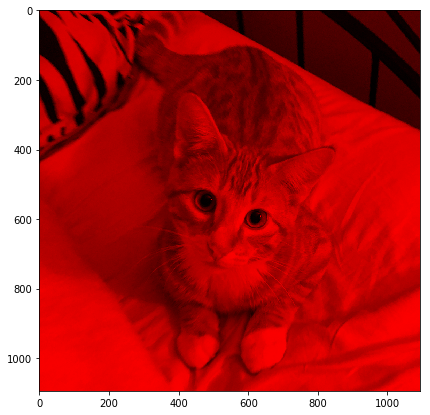

In [0]:
red_colored = np.zeros((img_r.shape[0],img_r.shape[1],3), dtype=np.int)
red_colored[:,:,0] = img_r
plt.imshow(red_colored)
plt.show()

### Exercise

Show two other channels

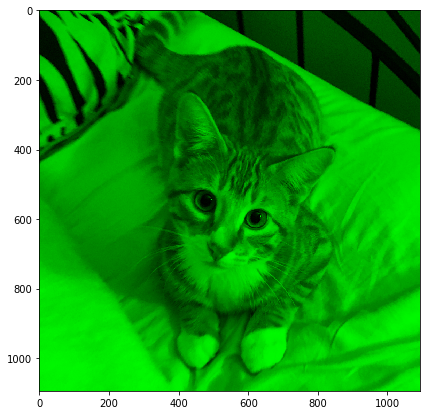

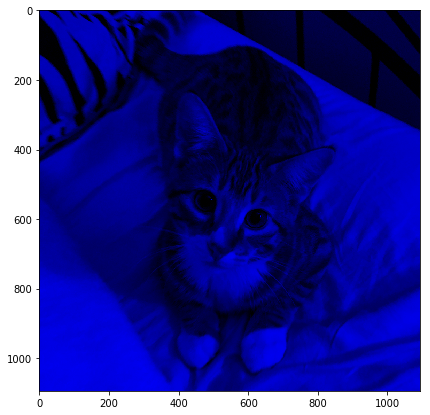

In [0]:
green_colored = np.zeros((img_g.shape[0],img_g.shape[1],3), dtype=np.int)
green_colored[:,:,1] = img_g
plt.imshow(green_colored)
plt.show()

blue_colored = np.zeros((img_b.shape[0],img_b.shape[1],3), dtype=np.int)
blue_colored[:,:,2] = img_b
plt.imshow(blue_colored)
plt.show()

### Drawing on image

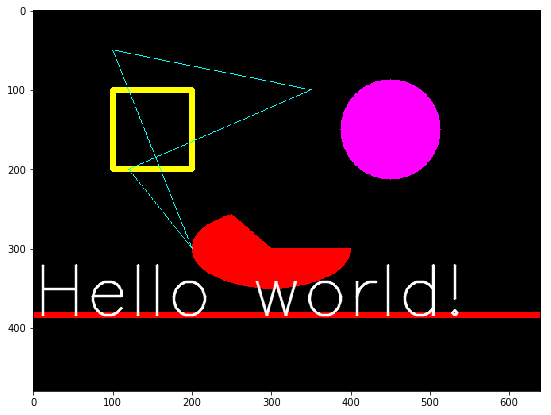

In [0]:
# create black canvas
h, w, c = 480, 640, 3 # height, width and channels
img_to_draw = np.zeros((h, w, c), np.uint8)

# draw line 
# cv2.line params: 
# image, line begin point, line end point, color, thikness
cv2.line(img_to_draw, (0,int(4*h/5)), (w,int(4*h/5)), (255,0,0), 5)

# draw rectangle
# cv2.rectangle params:
# image, left corner, opposite to left corner, color, thikness
cv2.rectangle(img_to_draw,(100,100),(200,200),(255,255,0),5)

# draw circle
# cv2.circle params:
# image, center, radius, color, thikness (-1 - paint over)
cv2.circle(img_to_draw,(450,150), 63, (255,0,255), -1)

# draw ellipse
# cv2.ellipse params:
# image, center, half of the size of the ellipse main axes, ellipse rotation angle in degrees, 
# starting angle of the elliptic arc in degrees, ending angle, color, thickness
cv2.ellipse(img_to_draw,(300,300),(100,50),0,0,240,255,-1)

# draw arbitrary polygon
pts = np.array([[100,50],[200,300],[120,200],[350,100]], np.int32)
pts = pts.reshape((-1,1,2))

# cv2.polylines params:
# image, polygon lines, closed or not, color
cv2.polylines(img_to_draw,[pts],True,(0,255,255))

# add text on image
font = cv2.FONT_HERSHEY_SIMPLEX
text = 'Hello world!'
# cv2.putText params:
# image, text, bottom-left corner of the text in the image,
# font, size, color, thikness, line type
cv2.putText(img_to_draw, text, (0,int(4*h/5)), font, 3,(255,255,255),2,cv2.LINE_AA)
    
plt.imshow(img_to_draw)

### Exercise

Draw a circle in the center of the image

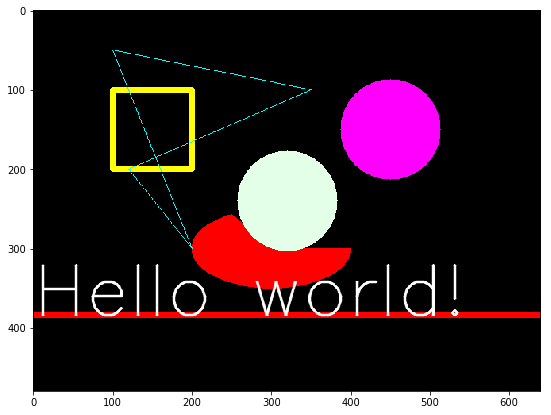

In [0]:
# your code here
cv2.circle(img_to_draw,(int(w/2), int(h/2)), 63, (228,282,232), -1)

plt.imshow(img_to_draw)
plt.show()

### Image arithmetic

**Addition:**  
$Output = Image1 + Image2$

**Subtraction:**  
$Output = Image1 - Image2$  
*Note:* $Image1 - Image2 != Image2 - Image1$

**Blending:**  
$Output = \alpha Image1 + (1 - \alpha )Image2 $

**Weighted sum:**  
$Output = \alpha Image1 + \beta Image2  + \gamma$

### Exercise

Load space.jpg

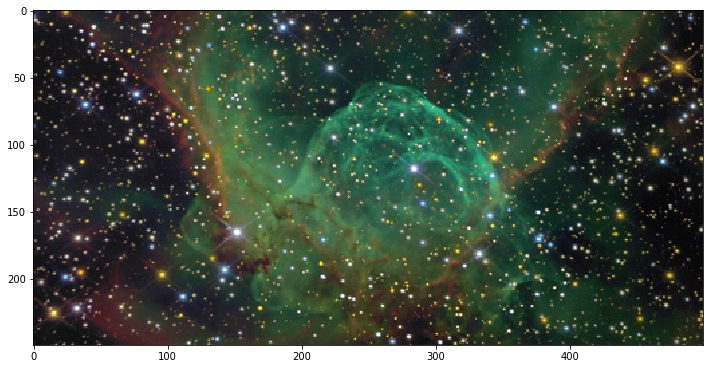

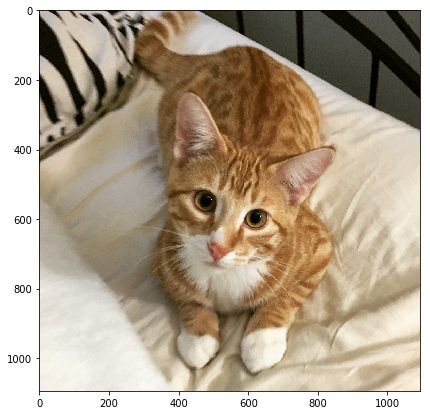

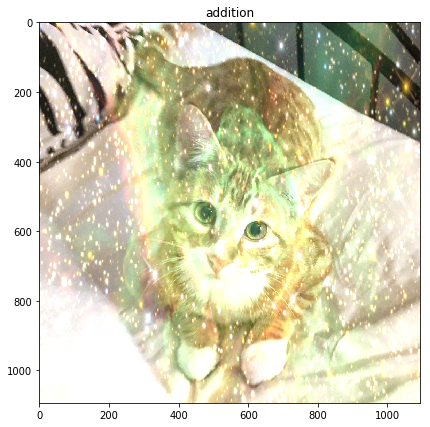

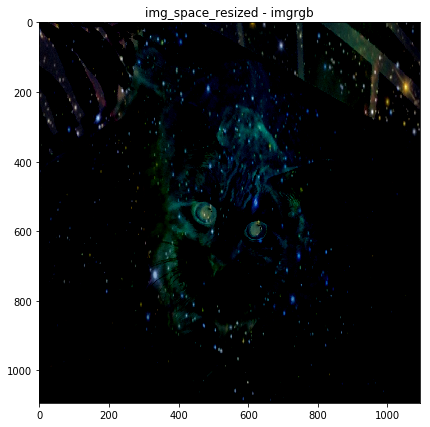

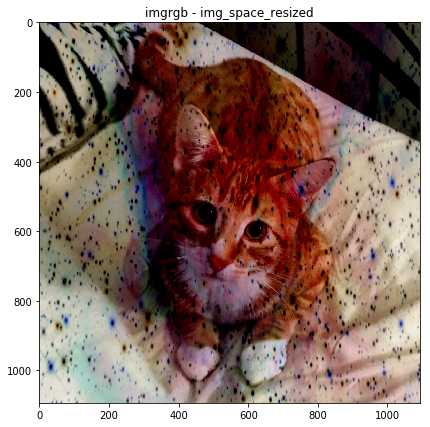

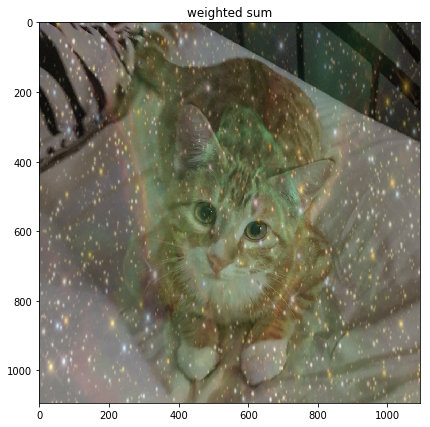

In [0]:
# load
img_space = cv2.imread('space.jpg', cv2.IMREAD_COLOR)
# convert to RGB
img_space = cv2.cvtColor(img_space, cv2.COLOR_BGR2RGB)
plt.imshow(img_space)
plt.show()


plt.imshow(imgrgb)
plt.show()

# make both images the same size
img_space_resized = cv2.resize(img_space, (imgrgb.shape[1],imgrgb.shape[0]))

# addition operation
img_addition = cv2.add(img_space_resized, imgrgb)
plt.imshow(img_addition)
plt.title('addition')
plt.show()

# substraction operation isn't commutative, it means that (img1 - img2) != (img2 - img1)
# case 1
img_substraction1 = cv2.subtract(img_space_resized, imgrgb)
plt.imshow(img_substraction1)
plt.title('img_space_resized - imgrgb')
plt.show()

# case 2
img_substraction2 = cv2.subtract(imgrgb, img_space_resized)
plt.imshow(img_substraction2)
plt.title('imgrgb - img_space_resized')
plt.show()

# weighted sum
img_weighted_sum = cv2.addWeighted(imgrgb, 0.5, img_space_resized,0.5,0)
plt.imshow(img_weighted_sum)
plt.title('weighted sum')
plt.show()

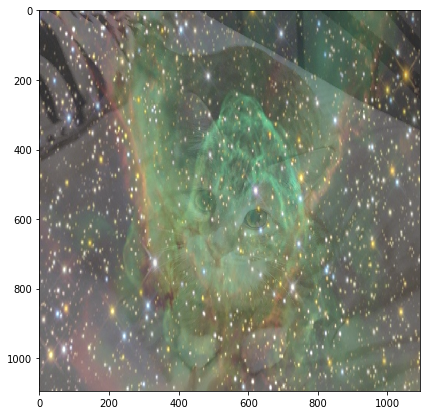

In [0]:
#@title Interactive Weighted Addition { run: "auto" }

alpha = 0.25 #@param {type:"slider", min:0, max:1, step:0.01}
gamma = 36 #@param {type:"slider", min:0, max:255, step:1}
beta = 1 - alpha

img_weighted_sum = cv2.addWeighted(imgrgb, alpha, img_space_resized, beta, gamma)
plt.imshow(img_weighted_sum)
plt.show()

### Question: What does gamma affect?

### Skin detection

**Skin detection is done as follows:**

$(Saturation >= 0.2) AND (0.5<Luminance/Saturation<0.3)AND (Hue<=28$ $OR$ $  Hue>=330)$

However since in OpenCV the saturation and luminance range from 0 to 255 and hue ranges from 0 to 179, **skin detection in OpenCV is done as follows:**

$(Saturation >= 50) AND (0.5<Luminance/Saturation<0.3)AND (Hue<=14$ $OR$ $  Hue>=165)$

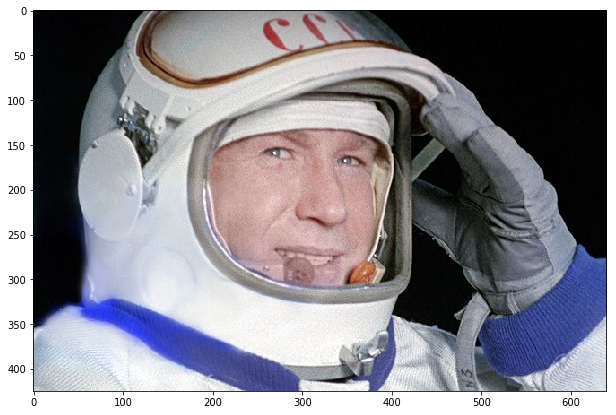

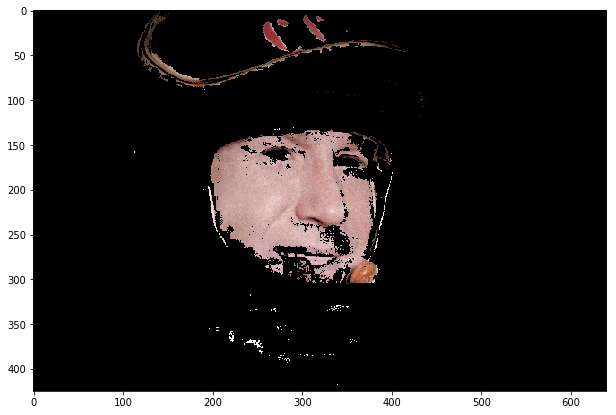

In [0]:
# load an image
img_person = cv2.imread('person.jpg', cv2.IMREAD_COLOR)
img_person = cv2.cvtColor(img_person, cv2.COLOR_BGR2RGB)
# show an image
plt.imshow(img_person)
plt.show()
# conver to HSV (hue, saturation, value)
img_person_hls = cv2.cvtColor(img_person, cv2.COLOR_RGB2HLS)
# split to three channels
img_h, img_l, img_s = cv2.split(img_person_hls)

# detecting the skin
for i in range (img_person.shape[0]):
  for j in range  (img_person.shape[1]):
    if (img_s[i,j]>=50) and img_l[i,j]/img_s[i,j]>0.5 and  img_l[i,j]/img_s[i,j]<3 and (img_h[i,j]<=14 or img_h[i,j]>=165):
      pass
    else: 
      img_person[i,j] = 0

# show detected skin
plt.imshow(img_person)
plt.show()

### Red eyes detection

**Red eyes detection is done as follows:**

$(Luminance>=0.25)AND(Saturation >= 0.4) AND (0.5<Luminance/Saturation<1.5)AND (Hue<=14$ $OR$ $  Hue>=324)$

**Skin detection in OpenCV is done as follows:**

$(Luminance>=64)AND(Saturation >= 100) AND (0.5<Luminance/Saturation<1.5)AND (Hue<=7$ $OR$ $  Hue>=162)$

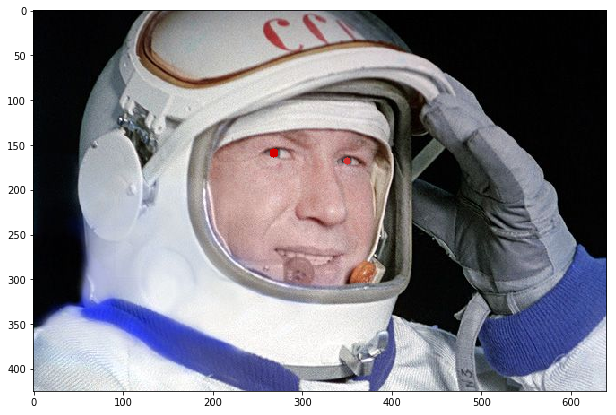

In [0]:
# load an image
img_person = cv2.imread('person.jpg', cv2.IMREAD_COLOR)
img_person = cv2.cvtColor(img_person, cv2.COLOR_BGR2RGB)
# draw red eyes
red_eyes = cv2.circle(img_person,(268,159), 5, (210,0,0), -1)
red_eyes = cv2.circle(red_eyes,(350,168), 4, (210,50,50), -1)
# show an image
plt.imshow(img_person)
plt.show()

### Exersice

Detect red eyes

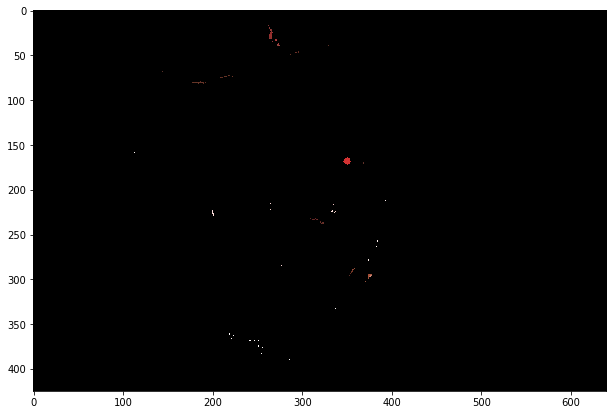

In [0]:
# conver to HSV (hue, saturation, value)
img_person_hls = cv2.cvtColor(img_person, cv2.COLOR_RGB2HLS)
# split to three channels

img_h, img_l, img_s = cv2.split(img_person_hls)

# detetc red eyes

for i in range (img_person.shape[0]):
  for j in range  (img_person.shape[1]):
    if (img_l[i, j]>=64) and (img_s[i,j]>=100) and img_l[i,j]/img_s[i,j]>0.5 and  img_l[i,j]/img_s[i,j]<1.5 and (img_h[i,j]<=7 or img_h[i,j]>=162):
      pass
    else: 
      img_person[i,j] = 0

# show detected red eyes
plt.imshow(red_eyes)
plt.show()

## References (Please add references that you will use in lab.)

- How to use colab forms: https://colab.research.google.com/notebooks/forms.ipynb#scrollTo=ig8PIYeLtM8g
